# Avocado price prediction

# Introduction

## Features

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

### Purpose

The purpose of this notebook is to perform a robust analysis of the data. It will include: data cleaning, descriptive analysis, epxloratory data analysis, data analysis with data wranging, classification and regression models.

### Importing libraries

In [21]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import sklearn
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
np.warnings.filterwarnings('ignore')

In [22]:
#loading and reading the dataset
df= pd.read_csv(r"C:\Users\INTEL\Desktop\Projects\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [23]:
#dropping the unwanted column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [24]:
#to check the whole summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


There are no null values. 18249 entries and 13 columns.

In [25]:
#checking dimensions of the dataset 
df.shape

(18249, 13)

In the given dataset there are 18249 rows and 13 columns.

In [26]:
#to check datatype of the dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The features are in float data type. It contains object and integer datatypes also.

In [27]:
#to know all the columns of the dataset
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Total 13 columns has been displayed successfully.

In [28]:
#checking statistical summary
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [29]:
#to split the columns into incorrect and correct data
dataIncorrect = df[((df['4046'] + df['4225'] + df['4770'] + df['Total Bags']) != df['Total Volume'] ) | ((df['Small Bags'] + df['Large Bags'] + df['XLarge Bags']) != df['Total Bags'] )]
dataCorrect =  df[((df['4046'] + df['4225'] + df['4770'] + df['Total Bags']) == df['Total Volume'] ) & ((df['Small Bags'] + df['Large Bags'] + df['XLarge Bags']) == df['Total Bags'] )]

dataIncorrect.reset_index(inplace = True)
dataCorrect.reset_index(inplace = True)

print("Data Total",df.shape)
print("Data Incorrect",dataIncorrect.shape)
print("Data Correct",dataCorrect.shape)

Data Total (18249, 13)
Data Incorrect (8143, 14)
Data Correct (10106, 14)


In [30]:
#checking the dimensions of the correct data
dataCorrect =dataCorrect[(dataCorrect['Small Bags']<300000.0) & (dataCorrect['Large Bags']<150000.0) & (dataCorrect['XLarge Bags']<10000.0)]
dataCorrect.shape

(8888, 14)

From the total dataset which has total 18249 rows after splitting the columnsn and checking the dimensions the correct data contains 8888 columns and 14 rows.

# EDA

In [31]:
#to check null values by isnull 
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

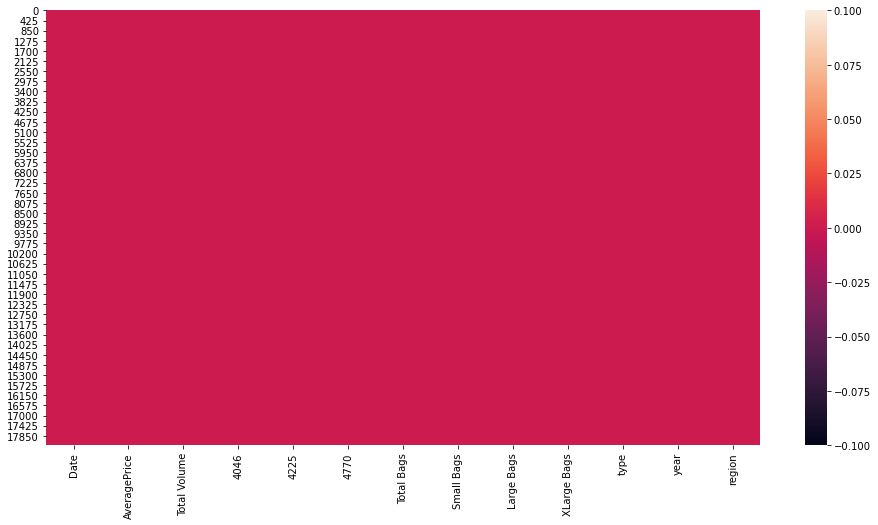

In [32]:
#another way to check missing values
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())
plt.show()                  #visualizing null values using heatmap

No null values in the given dataset.

West                   338
Louisville             338
Pittsburgh             338
PhoenixTucson          338
LasVegas               338
GrandRapids            338
Nashville              338
MiamiFtLauderdale      338
LosAngeles             338
Tampa                  338
Northeast              338
Detroit                338
TotalUS                338
Syracuse               338
DallasFtWorth          338
HartfordSpringfield    338
Albany                 338
Portland               338
Roanoke                338
Chicago                338
Sacramento             338
Southeast              338
Boise                  338
SouthCarolina          338
Boston                 338
Philadelphia           338
Plains                 338
Charlotte              338
SouthCentral           338
SanDiego               338
Orlando                338
Denver                 338
GreatLakes             338
CincinnatiDayton       338
RichmondNorfolk        338
NewOrleansMobile       338
HarrisburgScranton     338
C

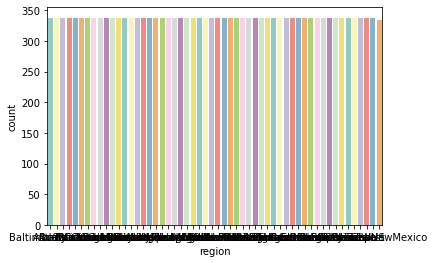

In [33]:
#checking value counts of the column 'region' and plotting the countplot
print(df['region'].value_counts())
print('\n', 'There are:', len(df['region'].unique()), 'unique values in the feature')
sns.countplot('region', data=df, palette='Set3')
plt.show()

The Features have 54 unique values which are perfectly distributed through the dataset.
For machine learning purposes, the data could be transformed with the OneHotEncoder formula to have a larger variaty of features to build a machine learning model
The data can be used as well to analyze the price behaviour and quantity sold in each region

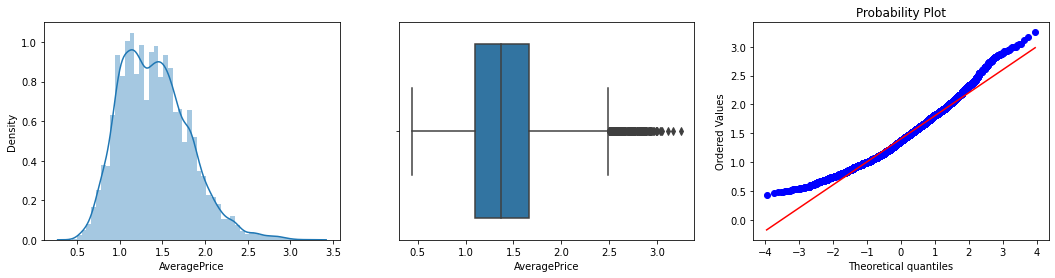

In [34]:
#plotting distribution plot, boxplot and probplot of the average price
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
sns.distplot(df.AveragePrice, ax=ax[0])
sns.boxplot(df.AveragePrice, ax=ax[1])
stats.probplot(df['AveragePrice'], plot=ax[2])
plt.show()

In [35]:
#check unique of types
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

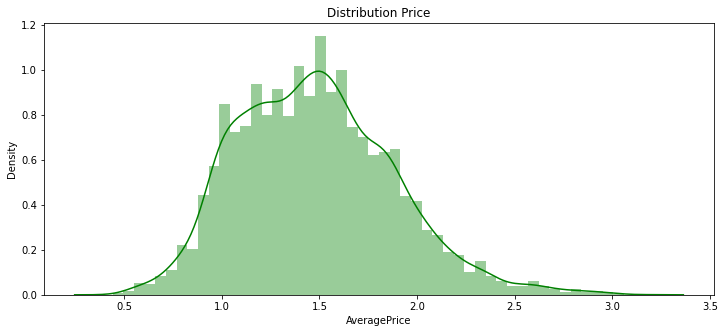

In [36]:
#distribution plot of average price
plt.figure(figsize=(12,5))
plt.title("Distribution Price")
ax = sns.distplot(dataCorrect["AveragePrice"], color = 'g')

### Data imbalancing

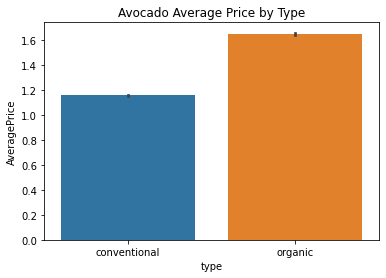

In [37]:
#checking conventional and organic data using barplot
plt.figure()
plt.title("Avocado Average Price by Type")
sns.barplot(x="type",y="AveragePrice",data= df)
plt.show()

In [38]:
#checking length of conventional
conventional = len(df[df['type'] == 'conventional'])
conventional

9126

In [39]:
#checking length of organic
organic = len(df[df['type']== 'organic'])
organic

9123

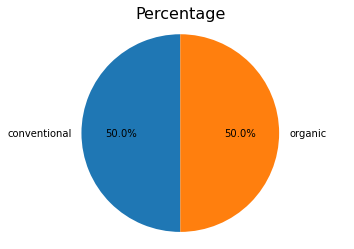

In [40]:
#percentage piechart
y = ('conventional', 'organic')
y_pos = np.arange(len(y))
x = (conventional, organic)
labels = 'conventional', 'organic'
sizes = [conventional, organic]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:

# Skewness

In [41]:
print("Skewness: %f" % df['AveragePrice'].skew())

Skewness: 0.580303


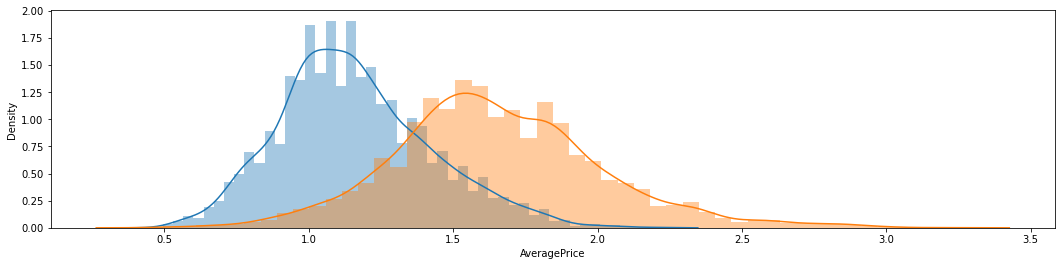

In [42]:
#distplot of both conventional and organic 
df_conventional = df[df['type'] == 'conventional']
# df_conventional.shape
df_organic = df[df['type'] == 'organic']
# df_organic.shape
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
sns.distplot(df_conventional['AveragePrice']) # histogram
sns.distplot(df_organic['AveragePrice']) # histogram
plt.show()

## Boxplot

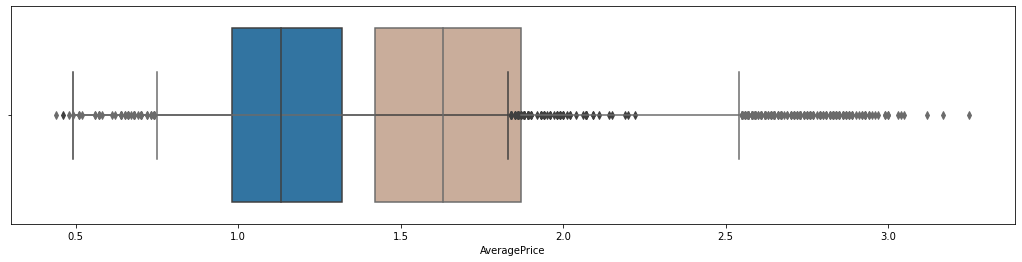

In [43]:
#by using boxplot
df_conventional = df[df['type'] == 'conventional']
# df_conventional.shape
df_organic = df[df['type'] == 'organic']
# df_organic.shape
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
sns.boxplot(df_conventional['AveragePrice']) # histogram
sns.boxplot(df_organic['AveragePrice'],palette = 'pink') # histogram
plt.show()

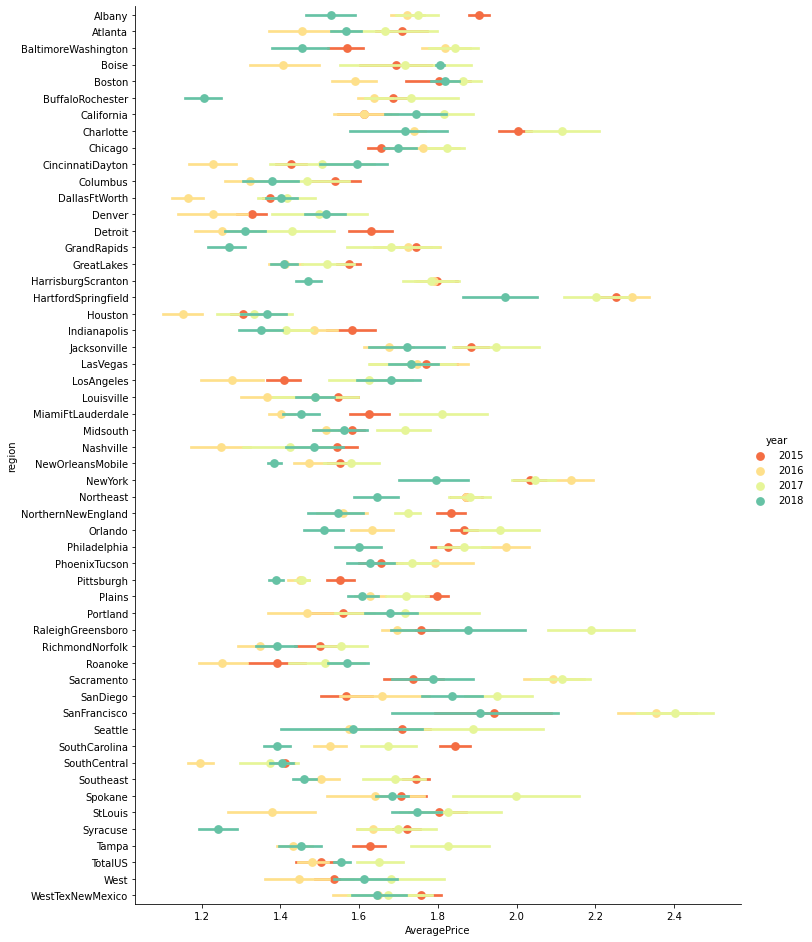

In [44]:
mask = df['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=df[mask],
    hue='year',size=13,aspect=0.8,palette='Spectral',join=False,)

## Scaling

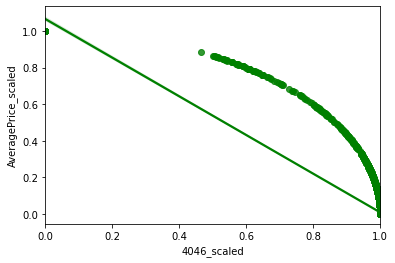

In [45]:
#scaling and visualizing by regplot
scaler = Normalizer()
scaler.fit(df[['4046', 'AveragePrice']].values)
df['4046_scaled'] = scaler.transform(df[['4046', 'AveragePrice']].values)[:,0]
df['AveragePrice_scaled'] = scaler.transform(df[['4046', 'AveragePrice']].values)[:,1]
sns.regplot(x='4046_scaled', y='AveragePrice_scaled', data=df, color='g')
plt.show()

In [46]:
#label encoding by transform
label = LabelEncoder()
dicts = {}
label.fit(dataCorrect.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
dataCorrect.type = label.transform(dataCorrect.type) 

In [47]:
dataCorrect['Date'] =dataCorrect['Date'].astype('datetime64[ns]')

In [48]:
dataCorrect['type'].value_counts()

1    5495
0    3393
Name: type, dtype: int64

In [49]:
dataCorrect['year'].value_counts()

2015    2926
2016    2710
2017    2647
2018     605
Name: year, dtype: int64

In [50]:
dataCorrect['region'].value_counts()

NorthernNewEngland     221
BuffaloRochester       218
Charlotte              214
Albany                 210
Jacksonville           207
Syracuse               205
Nashville              205
HarrisburgScranton     204
Spokane                200
Pittsburgh             200
Tampa                  199
Boston                 198
Philadelphia           194
Boise                  194
Sacramento             192
Roanoke                191
Orlando                191
GrandRapids            191
NewOrleansMobile       190
RaleighGreensboro      190
SouthCarolina          188
MiamiFtLauderdale      188
SanFrancisco           186
Louisville             186
StLouis                184
LasVegas               184
RichmondNorfolk        184
BaltimoreWashington    183
Chicago                180
Columbus               179
SanDiego               176
PhoenixTucson          173
Atlanta                173
HartfordSpringfield    169
Indianapolis           169
Houston                163
DallasFtWorth          159
C

## Correlation

In [51]:
#to check correlation of the dataset
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,4046_scaled,AveragePrice_scaled
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,-0.079470,0.130146
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,0.033480,-0.049785
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,0.031666,-0.047148
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,0.033440,-0.049698
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,0.029054,-0.043230
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,0.032629,-0.048472
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,0.032796,-0.048652
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,0.029856,-0.044555
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,0.024003,-0.035721
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.005026,-0.002833


<AxesSubplot:title={'center':'Correlation Matrix'}>

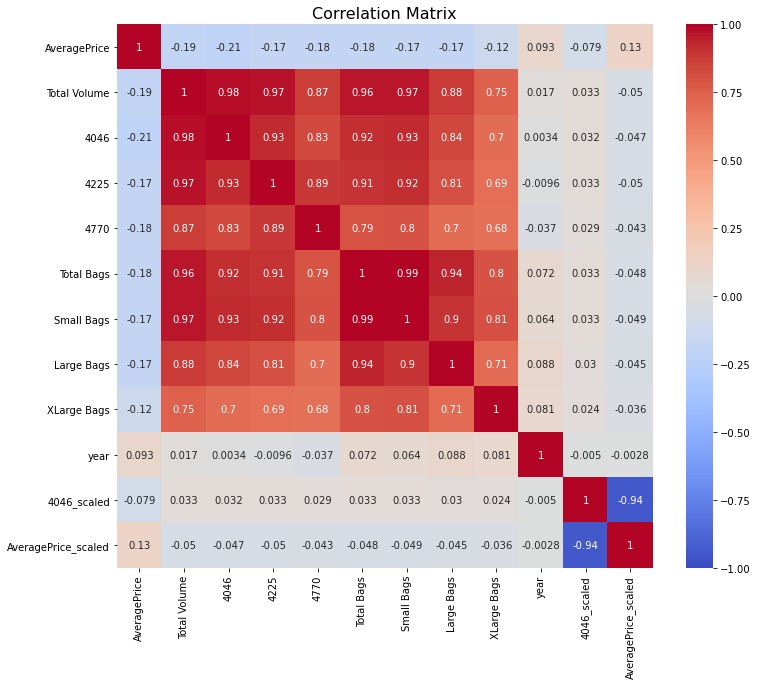

In [52]:
# visualisation of correlation of dataset by heatmap
corrmat = df.corr()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.set_title("Correlation Matrix", fontsize=16)
filter = df.columns != 'id'
sns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)

In [53]:
#checking duplicate values of the dataset
print('total number of duplicate values : ',sum(df.duplicated()))

total number of duplicate values :  0


## checking outliers

In [54]:
df.describe() # outliers?

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,4046_scaled,AveragePrice_scaled
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,1.824900e+04
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,0.983991,2.679950e-02
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,0.117105,1.316457e-01
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.000000,3.385565e-08
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,0.999998,1.040764e-05
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,1.000000,1.699614e-04
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,1.000000,1.853231e-03
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,1.000000,1.000000e+00


In [55]:
region_dummi =pd.get_dummies(dataCorrect['region'], prefix='reg')
region_dummi.head()

,reg_Albany,reg_Atlanta,reg_BaltimoreWashington,reg_Boise,reg_Boston,reg_BuffaloRochester,reg_California,reg_Charlotte,reg_Chicago,reg_CincinnatiDayton,...,reg_SouthCarolina,reg_SouthCentral,reg_Southeast,reg_Spokane,reg_StLouis,reg_Syracuse,reg_Tampa,reg_TotalUS,reg_West,reg_WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data_new = pd.concat([dataCorrect, region_dummi], axis=1)
data_new.head() 

,index,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,...,reg_SouthCarolina,reg_SouthCentral,reg_Southeast,reg_Spokane,reg_StLouis,reg_Syracuse,reg_Tampa,reg_TotalUS,reg_West,reg_WestTexNewMexico
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,0,0,0,0,0,0,0,0,0,0
1,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,...,0,0,0,0,0,0,0,0,0,0
2,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,...,0,0,0,0,0,0,0,0,0,0
3,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,...,0,0,0,0,0,0,0,0,0,0
4,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#dropping columns
data_new = data_new.drop('region', 1)
data_new = data_new.drop('index', 1)

In [58]:
data_train = pd.DataFrame(index=data_new.index)
targer_train = pd.DataFrame(index=data_new.index)
data_train = data_new
targer_train = data_new['AveragePrice']

In [59]:
data_train['monthy'] = data_train['Date'].astype('datetime64[ns]').apply(lambda ts: ts.month)

In [60]:
dummi_month =pd.get_dummies(data_train['monthy'], prefix='month')
data_train = pd.concat([data_train, dummi_month], axis=1)

In [61]:
data_train = data_train.drop(['monthy'],axis=1)
#data_train = data_train.drop(['Date'],axis=1)

In [62]:
data_train.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,1,0
3,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,...,0,0,0,0,0,0,0,0,1,0
4,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
data_train['year'].value_counts()

2015    2926
2016    2710
2017    2647
2018     605
Name: year, dtype: int64

In [64]:
region_dummi_fecha =pd.get_dummies(data_train['year'], prefix='year')

In [65]:
data_train = pd.concat([data_train, region_dummi_fecha], axis=1)

In [66]:
data_train.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,month_7,month_8,month_9,month_10,month_11,month_12,year_2015,year_2016,year_2017,year_2018
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,1,1,0,0,0
1,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,1,1,0,0,0
2,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,1,0,1,0,0,0
3,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,...,0,0,0,0,1,0,1,0,0,0
4,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,...,0,0,0,0,1,0,1,0,0,0


In [67]:
#dropping columns
data_train = data_train.drop(['year'],axis=1)
data_train = data_train.drop(['Date'], axis=1)
data_train = data_train.drop(['AveragePrice'],axis=1)

In [68]:
#viewing top 5 rows 
data_train.head(5)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,reg_Albany,...,month_7,month_8,month_9,month_10,month_11,month_12,year_2015,year_2016,year_2017,year_2018
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,1,...,0,0,0,0,0,1,1,0,0,0
2,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [69]:
# checking mean of targer_train
targer_train.mean()

1.4789187668766879

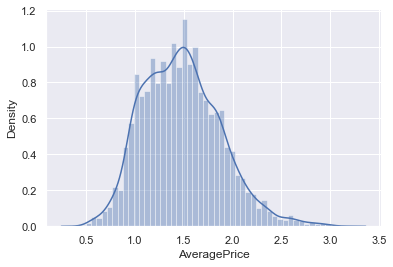

In [70]:
#visualisation by distribution plot
sns.set(font_scale = 1)
sns.distplot(targer_train);

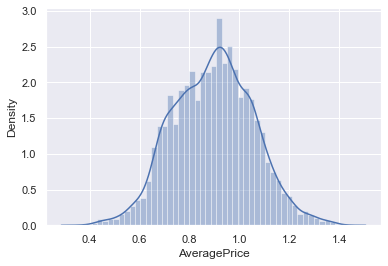

In [71]:
#visualisation by distribution plot(log)
sns.set(font_scale = 1)
sns.distplot(np.log1p(targer_train));

In [72]:
#viewing top 5 rows of data_train
data_train.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,reg_Albany,...,month_7,month_8,month_9,month_10,month_11,month_12,year_2015,year_2016,year_2017,year_2018
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,1,...,0,0,0,0,0,1,1,0,0,0
2,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [73]:
#splitting using train test split
X_train,X_test,y_train,y_test = train_test_split(data_train,targer_train,test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7110, 79) (7110,)
(1778, 79) (1778,)


In [75]:
#using ridge to predict the data 
ridge = Ridge(random_state=17)
ridge.fit(X_train, y_train);
ridge_pred = ridge.predict(X_test)

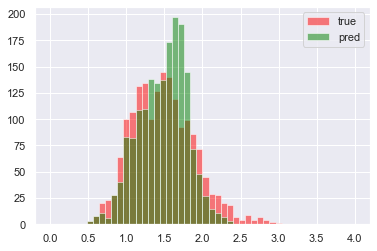

In [76]:
#histogram
sns.set(font_scale = 1)
plt.hist(y_test, bins=50, alpha=.5, color='red', label='true', range=(0,4));
plt.hist(ridge_pred, bins=50, alpha=.5, color='green', label='pred', range=(0,4));
plt.legend();

In [77]:
#mean absolute error
mean_absolute_error(y_test, ridge_pred)

0.18814538975357065

In [78]:
#mean squared error
1-mean_squared_error(y_test, ridge_pred)

0.9387812856961931

## Building model

In [79]:
# print X_train.shape, X_test.shape

classifiers = [['DecisionTree :',DecisionTreeRegressor()],
               ['RandomForest :',RandomForestRegressor()],
               ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
               ['SVM :', SVR()],
               ['AdaBoostClassifier :', AdaBoostRegressor()],
               ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
               ['Xgboost: ', XGBRegressor()],
               ['Lasso: ', Lasso()],
               ['Ridge: ', Ridge(random_state=17)],
               ['LineaRegresion: ', LinearRegression()],
               ['BayesianRidge: ', BayesianRidge()],
               ['ElasticNet: ', ElasticNet()],
               ['HuberRegressor: ', HuberRegressor()]]

print("Accuracy Results...")


for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Accuracy Results...
DecisionTree : 0.22897445837292987
RandomForest : 0.15922894305005258
KNeighbours : 0.2711261302700011
SVM : 0.3151298836051809
AdaBoostClassifier : 0.28566704993981284
GradientBoostingClassifier:  0.21654236241857372
Xgboost:  0.14140995794329284
Lasso:  0.3572231661577562
Ridge:  0.2474241586907125
LineaRegresion:  0.24736270788003073
BayesianRidge:  0.2475316096565639
ElasticNet:  0.3572250702041403
HuberRegressor:  1.3446028217113755


In [80]:
#random forest regressor
classifier = RandomForestRegressor()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [81]:
mean_absolute_error(y_test, predictions)

0.11247919010123734

,Y Test,Pred
7734,1.55,1.4637
8840,1.96,1.7291
95,1.07,1.1021
6727,1.74,1.6066
7169,1.05,1.3609


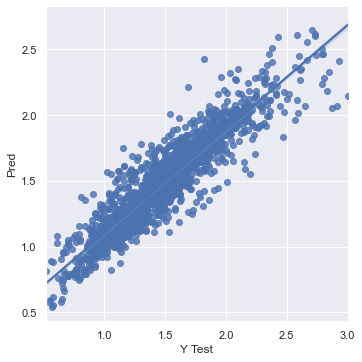

In [82]:
sns.set(font_scale = 1)
data = pd.DataFrame({'Y Test':y_test , 'Pred':predictions},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

## Saving the model:

In [83]:
filename ="Avocado project.pkl"  #saving the model as a pickle
pickle.dump(RandomForestRegressor, open(filename, 'wb')) 